In [1]:
# https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# Age | Objective Feature | age | int (days)
# Height | Objective Feature | height | int (cm) |
# Weight | Objective Feature | weight | float (kg) |
# Gender | Objective Feature | gender | categorical code |
# Systolic blood pressure | Examination Feature | ap_hi | int |
# Diastolic blood pressure | Examination Feature | ap_lo | int |
# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
# Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
# Smoking | Subjective Feature | smoke | binary |
# Alcohol intake | Subjective Feature | alco | binary |
# Physical activity | Subjective Feature | active | binary |
# Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


# id ID number
# age in days
# gender 1 - women, 2 - men
# height cm
# weight kg
# ap_hi Systolic blood pressure
# ap_lo Diastolic blood pressure
# cholesterol 1: normal, 2: above normal, 3: well above normal
# gluc 1: normal, 2: above normal, 3: well above normal
# smoke whether patient smokes or not
# alco Binary feature
# active Binary feature
# cardio Target variable

#1, import data and preview the data
import pandas as pd
df= pd.read_csv("C:\\From Lenevo\\University of Southampton\\2, On Campus\\Lectures\\Semester 2\\COMP6208 Advanced Machine Learning\\Project\\cardio_train.csv",index_col=False)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
#2, data cleaning

#dummy coding for gender column
df["gender"].replace({1: 0, 2: 1}, inplace=True)
#create a new column of age in years
df["age_year"]=round(df["age"].div(365),0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0,48.0


In [3]:
#2.2 deduplication
print(df.shape)
df.drop_duplicates(subset =[c for c in list(df.columns) if c!='id'],keep = 'first', inplace = True) 
print(df.shape)

(70000, 14)
(69976, 14)


In [4]:
#2.3 return rows have missing data
df[df.isnull().any(axis=1)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year


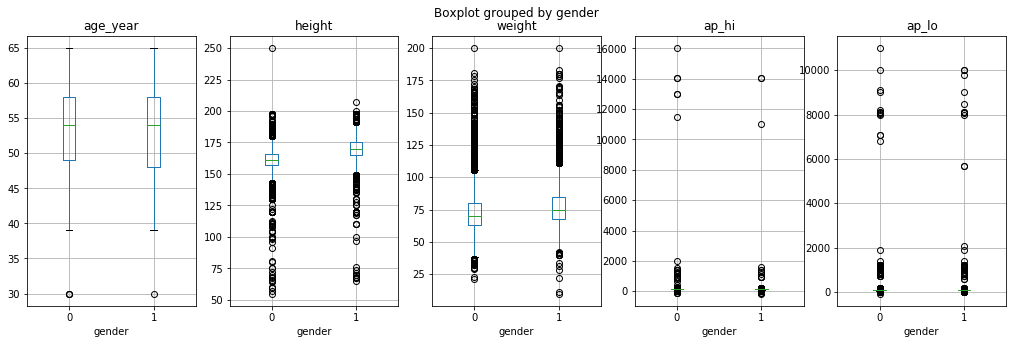

In [6]:
#2.4 anomalies detection
#Univariate anomalies detection
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,5,figsize=(17,5)) # create figure and axes
for i,el in enumerate(list(df[['age_year','height','weight','ap_hi','ap_lo',]].columns.values)):
    a = df.boxplot(el, by="gender", figsize=[2.4,5],layout=[1,1],ax=axes.flatten()[i])

plt.show()

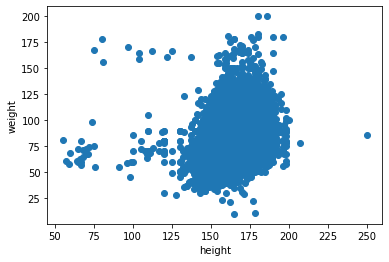

In [12]:
#Multivariate anomalies detection
#https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
plt.scatter(df[['height']],df[['weight']])
plt.xlabel("height")
plt.ylabel("weight")

plt.show()

In [16]:
df.loc[(df['height'] < 80) & (df['weight'] >150 )]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
12770,18218,19594,0,75,168.0,120,80,1,1,1,0,1,1,54.0


In [ ]:
#knn anomalies detection
#https://pyod.readthedocs.io/en/latest/

                age        height        weight         ap_hi         ap_lo
count  45530.000000  45530.000000  45530.000000  45530.000000  45530.000000
mean      53.452396    161.355612     72.565605    128.139249     94.522776
std        6.663081      7.052726     14.238838    158.054522    174.776855
min       29.750685     55.000000     21.000000   -140.000000    -70.000000
25%       49.424658    157.000000     63.000000    120.000000     80.000000
50%       54.043836    161.000000     70.000000    120.000000     80.000000
75%       58.438356    166.000000     80.000000    140.000000     90.000000
max       64.934247    250.000000    200.000000  16020.000000  11000.000000
                age        height        weight         ap_hi         ap_lo
count  24470.000000  24470.000000  24470.000000  24470.000000  24470.000000
mean      53.129035    169.947895     77.257307    130.078872    100.551982
std        6.930830      7.228895     14.187636    146.186152    211.557292
min       29

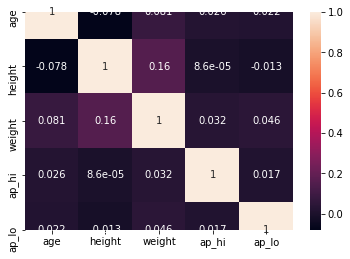

In [41]:
#3, descriptive statistics: 
#Univariate analysis:min, max, mean, median, variance, boxplot,

#Do we need to standardize variables with different scales before doing correlation analysis?
#https://www.researchgate.net/post/Do_we_need_to_standardize_variables_with_different_scales_before_doing_correlation_analysis

#cardiovascular.describe()
df1=df[df['gender']==1]#women
df2=df[df['gender']==2]#men

print(df1[['age','height','weight','ap_hi','ap_lo',]].describe())
print(df2[['age','height','weight','ap_hi','ap_lo',]].describe())
#Bivariate and multivariate analysis: pivottable, #dependence
corrMatrix1 = df1[['age','height','weight','ap_hi','ap_lo',]].corr()
corrMatrix2 = df2[['age','height','weight','ap_hi','ap_lo',]].corr()
print (corrMatrix1)
print (corrMatrix2)
import seaborn as sn
sn.heatmap(corrMatrix1, annot=True)
#sn.heatmap(corrMatrix2, annot=True)

In [23]:
#multivariate analysis

# id ID number
# age in days
# gender 1 - women, 2 - men
# height cm
# weight kg
# ap_hi Systolic blood pressure
# ap_lo Diastolic blood pressure
# cholesterol 1: normal, 2: above normal, 3: well above normal
# gluc 1: normal, 2: above normal, 3: well above normal
# smoke whether patient smokes or not
# alco Binary feature
# active Binary feature
# cardio Target variable


import pandasql as ps
q1 = """SELECT cholesterol,cardio,count(ID),avg(age_year) FROM df group by cholesterol,cardio"""
# median(ap_hi),median(ap_lo),

print(ps.sqldf(q1, locals()))

   cholesterol  cardio  count(ID)  avg(age_year)
0            1       0      29313      51.393614
1            1       1      23048      54.656933
2            2       0       3799      52.584101
3            2       1       5750      54.457739
4            3       0       1892      55.244715
5            3       1       6174      56.493359
